In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import msc_project.utils.merge_dataframes as md
plt.style.use('ggplot')

In [4]:
# prepare data
SYMMETRY_POINTS = '/scratch/msc24h18/msc_project/results/symmetry_points/symmetry_point.csv'
AP_1U0D_0NOISE = '/scratch/msc24h18/msc_project/results/test31/write_noise_std_0.00.csv'
AP_1U1D_0NOISE = '/scratch/msc24h18/msc_project/results/test35/no_out_scaling_noise_up_down_0_1_1.csv'
AP_1U2D_0NOISE = '/scratch/msc24h18/msc_project/results/test35/no_out_scaling_noise_up_down_0_1_2.csv'

df_1u0d_0noise = pd.read_csv(AP_1U0D_0NOISE)
df_1u1d_0noise = pd.read_csv(AP_1U1D_0NOISE)
df_1u2d_0noise = pd.read_csv(AP_1U2D_0NOISE)

# 1u0d has some extra devices; remove them
df_1u0d_0noise = df_1u0d_0noise[df_1u0d_0noise['test_time'].isin(df_1u1d_0noise['test_time'])]

# merge with symmetry point data (some already done but do anyway)
symmetry_points = pd.read_csv(SYMMETRY_POINTS)
df_1u0d_0noise = md.merge_dataframes(df_1u0d_0noise, symmetry_points)
df_1u1d_0noise = md.merge_dataframes(df_1u1d_0noise, symmetry_points)
df_1u2d_0noise = md.merge_dataframes(df_1u2d_0noise, symmetry_points)

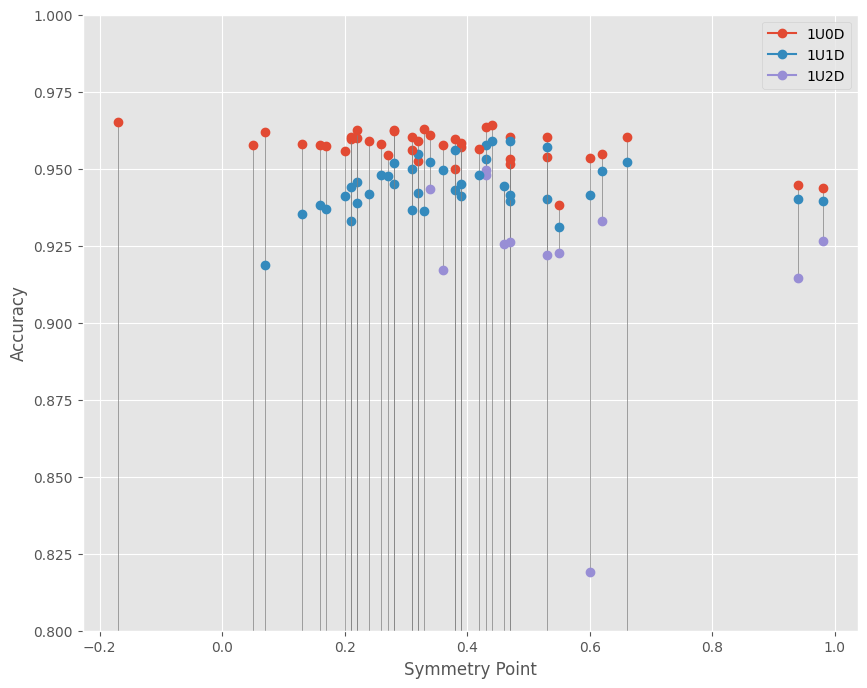

In [5]:
# plot the change in accuracy of each device on an accuracy vs symmetry point plot

fig, ax = plt.subplots(figsize=(10, 8))

# all the dataframes should have the same order
plot_1u2d_threshold = 0
for (idx, row_1u0d), (_, row_1u1d), (_, row_1u2d) in zip(df_1u0d_0noise.iterrows(), df_1u1d_0noise.iterrows(), df_1u2d_0noise.iterrows()):
    ax.plot([row_1u0d['symmetry_point'], row_1u1d['symmetry_point']], [row_1u0d['val_acc'], row_1u1d['val_acc']], color = 'gray', lw=0.5)

    if row_1u2d['val_acc'] > plot_1u2d_threshold:
        ax.plot([row_1u1d['symmetry_point'], row_1u2d['symmetry_point']], [row_1u1d['val_acc'], row_1u2d['val_acc']], color = 'gray', lw=0.5)

    ax.plot(row_1u0d['symmetry_point'], row_1u0d['val_acc'], marker = 'o', color = 'C0', label='1U0D' if idx == 0 else "")
    ax.plot(row_1u1d['symmetry_point'], row_1u1d['val_acc'], marker = 'o', color = 'C1', label='1U1D' if idx == 0 else "")
    if row_1u2d['val_acc'] > plot_1u2d_threshold:
        ax.plot(row_1u2d['symmetry_point'], row_1u2d['val_acc'], marker = 'o', color = 'C2', label='1U2D' if idx == 0 else "")

ax.set(xlabel = 'Symmetry Point', ylabel = 'Accuracy', ylim = (0.8, 1))
ax.legend()
plt.show()

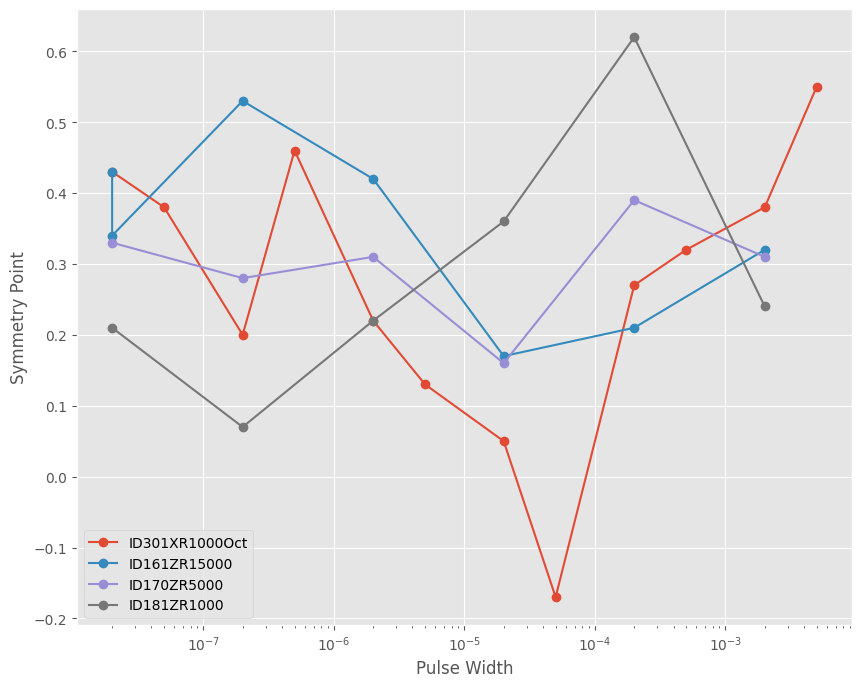

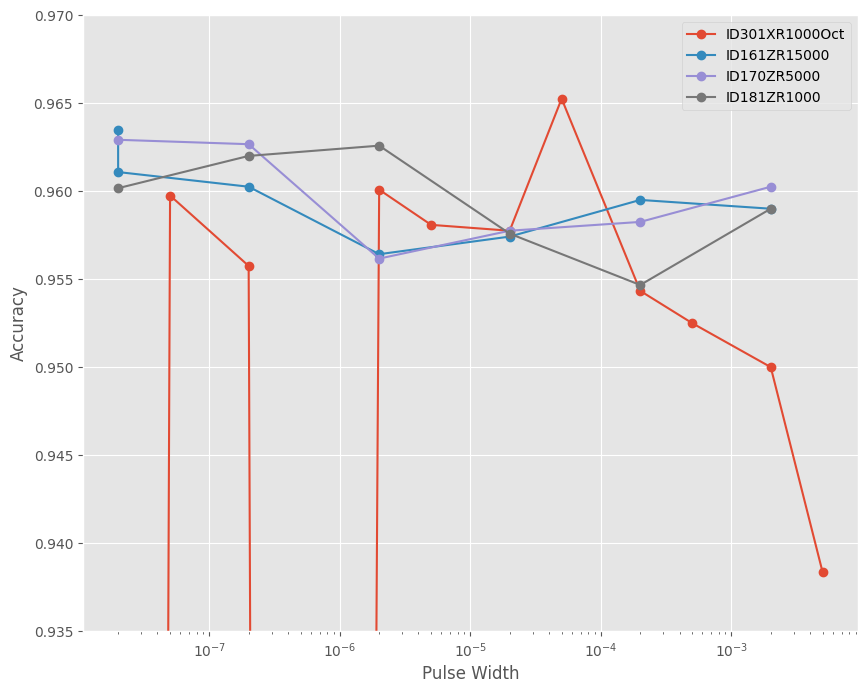

In [20]:
# plot pluse width vs symmetry point
fig, ax = plt.subplots(figsize=(10, 8))

# keep only devices with multiple pulse widths
dlist = ["ID301XR1000Oct", "ID161ZR15000", "ID170ZR5000", "ID181ZR1000"]
pwdf = df_1u0d_0noise[df_1u0d_0noise['device_id'].isin(dlist)]

for d in dlist:
    data = pwdf[pwdf['device_id'] == d]
    ax.plot(data['pulseWidth'], data['symmetry_point'], marker = 'o', label = d)

ax.set(xlabel = 'Pulse Width', ylabel = 'Symmetry Point', xscale = 'log')
ax.legend()
plt.show()

# plot pluse width vs accuracy
fig, ax = plt.subplots(figsize=(10, 8))

# keep only devices with multiple pulse widths
pwdf = df_1u0d_0noise[df_1u0d_0noise['device_id'].isin(dlist)]

for d in dlist:
    data = pwdf[pwdf['device_id'] == d]
    ax.plot(data['pulseWidth'], data['val_acc'], marker = 'o', label = d)

ax.set(xlabel = 'Pulse Width', ylabel = 'Accuracy', xscale = 'log', ylim=(0.935, 0.97))
ax.legend()
plt.show()
